<h1><b>HEARTBEAT CLASSIFIER</b></h1>

En este paso se monta Google Drive y se instancia la ruta del dataset.

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

path = '/content/gdrive/My Drive/'

dataset_path_A = path + "heartbeat_dataset/set_a"

dataset_path_B = path + "heartbeat_dataset/set_a"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Aquí se importan las librerias

In [ ]:
# Pandas
import pandas as pd

# Scikit learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.utils import class_weight

# Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.utils import to_categorical

# Audio
import librosa
import librosa.display
from scipy import signal

# Plot
import matplotlib.pyplot as plt

# Utility
import os
import glob
import numpy as np
from tqdm import tqdm
import itertools
import IPython.display as ipd

**Data Preprocessing**

En primer lugar, preparamos el dataset iterándolo y obteniendo sus respectivas etiquetas. 

Esto lo convertimos en un DataFrame de Pandas y lo mezclamos.

In [ ]:
# Iterate through each sound file and extract the features 
dataset = []

for filename in os.listdir(dataset_path_A):
        label = os.path.basename(filename).split("__")[0]
        if label != "Aunlabelledtest" and label != "Bunlabelledtest":
          print(label)
          filename = dataset_path_A + "/" + filename
          # skip audio smaller than 4 secs
          if librosa.get_duration(filename=filename)>=4:
                dataset.append({
                    "filename": filename,
                    "label": label
                })
      
for filename in os.listdir(dataset_path_B):
        label = os.path.basename(filename).split("__")[0]
        if label != "Aunlabelledtest" and label != "Bunlabelledtest":
          print(label)
          filename = dataset_path_B + "/" + filename
          # skip audio smaller than 4 secs
          if librosa.get_duration(filename=filename)>=4:
                dataset.append({
                    "filename": filename,
                    "label": label
                })

# Convert into a Panda dataframe 
dataset = pd.DataFrame(dataset)
dataset = shuffle(dataset, random_state=42)

print('Finished feature extraction from ', len(dataset), ' files')

artifact
artifact
artifact
artifact
artifact
artifact
artifact
artifact
artifact
artifact
artifact
artifact
artifact
artifact
artifact
artifact
artifact
artifact
artifact
artifact
artifact
artifact
artifact
artifact
artifact
artifact
artifact
artifact
artifact
artifact
artifact
artifact
artifact
artifact
artifact
artifact
artifact
artifact
extrahls
extrahls
artifact
extrahls
artifact
extrahls
extrahls
extrahls
extrahls
extrahls
extrahls
extrahls
extrahls
extrahls
extrahls
extrahls
extrahls
extrahls
extrahls
extrahls
murmur
murmur
murmur
murmur
murmur
extrahls
murmur
murmur
murmur
murmur
murmur
murmur
murmur
murmur
murmur
murmur
murmur
murmur
murmur
murmur
murmur
murmur
murmur
murmur
murmur
murmur
murmur
murmur
murmur
murmur
murmur
murmur
murmur
normal
normal
normal
normal
normal
normal
normal
normal
murmur
normal
normal
murmur
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
artifact
artif

Aquí podemos escuchar una de las muestras del dataset.

In [ ]:
print(dataset['label'][50])
audio, sr = librosa.load(dataset['filename'][50])
ipd.Audio(audio, rate=sr)

extrahls


Aquí instanciamos el filtro a utilizar. 

Esto lo hacemos ya que los latidos del corazón suelen rondar los 200 hz. Los latidos con soplo pueden llegar hasta 600 hz. Mas arriba de esta frecuencia no nos interesa ningun valor, por lo que eliminar el 'ruido' que pueda haber en esa zona del espectro puede aportar a una mejor clasificación.

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    """ Butterworth filter
    Args:
        lowcut (int): Low Cut Frequency.
        highcut (int): High Cut Frequency.
        fs (int): Sampling Frequency.
        order (int, optional): Order of the butterworth filter.
    """
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    sos = signal.butter(
        order, [low, high], analog=False, btype='band', output='sos')
    return sos

Aquí instanciamos la funcion que extrae los coeficientes de MEL y aplica el filtro.

In [ ]:
def extract_features(audio_path):
    y, sr = librosa.load(audio_path, duration=4)
    lowcut_freq, highcut_freq = 20, 600
    sos = butter_bandpass(lowcut_freq, highcut_freq, sr, order=8)
    filtered_y = signal.sosfilt(sos, y)
    mfccs = librosa.feature.mfcc(y=filtered_y, sr=sr, n_mfcc=40)
    return mfccs

Aquí dividimos el dataset en train y test a partir de la fucnión de *sklearn*: train_test_split. 

In [ ]:
train, test = train_test_split(dataset, test_size=0.2, random_state=42)
print("Train: %i" % len(train))
print("Test: %i" % len(test))

Train: 188
Test: 48


Aquí iteramos sobre el dataset para procesar y extraer las features.

In [ ]:
x_train, x_test = [], []
print("Extract features from TRAIN  and TEST dataset")
for idx in tqdm(range(len(train))):
    x_train.append(extract_features(train.filename.iloc[idx]))

for idx in tqdm(range(len(test))):
    x_test.append(extract_features(test.filename.iloc[idx]))
    
    
x_test = np.asarray(x_test)
x_train = np.asarray(x_train)

print("X train:", x_train.shape)
print("X test:", x_test.shape)

  0%|          | 0/188 [00:00<?, ?it/s]

Extract features from TRAIN  and TEST dataset


100%|██████████| 48/48 [00:11<00:00,  4.26it/s]

X train: (188, 40, 173)
X test: (48, 40, 173)


In [ ]:
print(len(x_train_[0]))

In [ ]:
print(x_train[0][0])

[-711.93029936 -705.79101218 -703.79274358 -700.89674614 -699.73478261
 -700.64587191 -699.75317728 -698.83049852 -700.96360728 -707.31681589
 -706.82699496 -702.59153302 -705.24510183 -708.90330248 -713.56595072
 -711.97688589 -709.5336894  -710.10590142 -711.4243074  -709.46847246
 -708.67352197 -708.20250164 -708.03867532 -706.64291185 -706.84809666
 -704.45978228 -699.25001145 -696.95010653 -692.33082721 -688.3221364
 -688.98918666 -691.47896312 -693.04175772 -692.3735732  -690.69850224
 -688.30670803 -685.52633767 -684.90409127 -682.0255166  -679.31503405
 -677.75912549 -676.31872465 -677.15073708 -677.79795921 -678.30013119
 -677.1169301  -678.68435515 -678.67480482 -676.24700745 -675.67427073
 -676.25421661 -680.06122183 -679.12120158 -679.68131409 -674.83600996
 -669.42863306 -669.11398988 -666.37927658 -665.79664819 -667.88643369
 -668.18314731 -669.78589274 -673.16045751 -677.41947333 -680.62379558
 -677.37232902 -676.03593051 -675.85803814 -673.36887273 -670.07888718
 -670.6

Convertir las etiquetas.


Aquí codificamos las etiquetas a un formato numérico.

Por ejémplo, teniendo 5 clases, los audios se clasifican con arrays de 5 dimensiones ([0, 0, 1, 0, 0]).


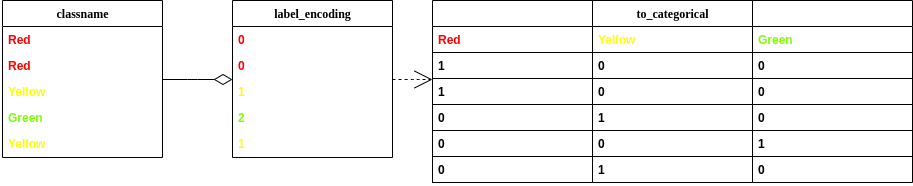

In [ ]:
encoder = LabelEncoder()
encoder.fit(train.label)

y_train = encoder.transform(train.label)
y_test = encoder.transform(test.label)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("X train:", x_train.shape)
print("Y train:", y_train.shape)
print()
print("X test:", x_test.shape)
print("Y test:", y_test.shape)


X train: (188, 40, 173, 1)
Y train: (188, 4)

X test: (48, 40, 173, 1)
Y test: (48, 4)


**Creación del modelo**

En este paso se instancia el modelo a utilizar. Utilizaremos una red neuronal convolucional porque necesitamos clasificar arrays de 40 dimensiones que contienen los MFCCs. Este tipo de modelo funciona mejor extrayendo features y patrones de estos arrays.

In [ ]:
# MODELO 1 PRUEBA 
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())

model.add(Dense(len(encoder.classes_), activation='softmax'))
# model.summary()

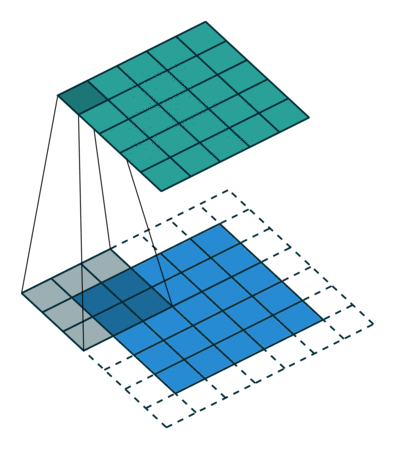

**Compilado del modelo**

En este paso el modelo es compilado. Aquí definimos algunos parámetros importantes como la funcion de pérdida y el optimizador. 

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

**Entrenado del modelo**

En este paso entrenamos el modelo. Elegí el valor de 200 epochs luego de analizar accuracy y loss de diferentes valores.

In [ ]:
history = model.fit(x_train, y_train,
              batch_size=128,
              epochs=200,
              validation_data=(x_test, y_test),
              # class_weight=class_weights,
              shuffle=True)

Epoch 1/200
2/2 [==============================] - 2s 547ms/step - loss: 20.2541 - accuracy: 0.1975 - val_loss: 3.8388 - val_accuracy: 0.3333
Epoch 2/200
2/2 [==============================] - 1s 354ms/step - loss: 8.7895 - accuracy: 0.3018 - val_loss: 6.4377 - val_accuracy: 0.3750
Epoch 3/200
2/2 [==============================] - 1s 383ms/step - loss: 10.5675 - accuracy: 0.3467 - val_loss: 3.2524 - val_accuracy: 0.4583
Epoch 4/200
2/2 [==============================] - 1s 384ms/step - loss: 8.3102 - accuracy: 0.2737 - val_loss: 2.3147 - val_accuracy: 0.5000
Epoch 5/200
2/2 [==============================] - 1s 383ms/step - loss: 6.0935 - accuracy: 0.3697 - val_loss: 2.0876 - val_accuracy: 0.5000
Epoch 6/200
2/2 [==============================] - 1s 378ms/step - loss: 4.3759 - accuracy: 0.3503 - val_loss: 2.0677 - val_accuracy: 0.3333
Epoch 7/200
2/2 [==============================] - 1s 377ms/step - loss: 3.7302 - accuracy: 0.3221 - val_loss: 1.9470 - val_accuracy: 0.3125
Epoch 8/200

**Evaluando el modelo**

En este paso podemos evaluar el modelo.

In [ ]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

# predictions = model.predict(x_train)

# print('Predicted index:', np.argmax(predictions[67]), 'of ', y_train[0])

Training Accuracy:  0.813829779624939
Testing Accuracy:  0.7291666865348816


En este paso podemos hacer predicts random con el dataset de test.

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  prediction = model.predict(np.array([image]))

  encoded_prediction = []

  for i in range (0, len(prediction[0])):
    if prediction[0][i] == np.max(prediction):
      encoded_prediction.append(1)
    else:
      encoded_prediction.append(0)
    i+= 1

  predicted_class = encoder.inverse_transform([np.argmax(encoded_prediction)])
  correct_class = encoder.inverse_transform([np.argmax(correct_label)])
  # print(predicted_class, correct_class)

  return predicted_class, correct_class
  # show_image(image, correct_class[0], predicted_class[0])


def show_image(img, label, guess):
  plt.figure()
  print(img.shape)
  plt.imshow(img.reshape(40, 173), cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= len(x_test):
        return int(num)
    else:
      print("Try again...")

# num = get_number()
# image = x_test[num]
# label = y_test[num]
# predict(model, image, label)

Aquí mostramos la matriz de confusión para el dataset de test

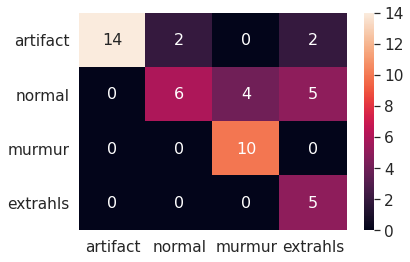

In [ ]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
import seaborn as sn

y_true = []
y_pred = []

for i in range (0, len(x_test)):
  image = x_test[i]
  label = y_test[i]
  predicted, correct = predict(model, image, label)
  y_true.append(correct)
  y_pred.append(predicted)

y_labels = ['artifact', 'normal', 'murmur', 'extrahls']

confusion_matrix_heart = confusion_matrix(y_true, y_pred, labels=y_labels)

df_cm = pd.DataFrame(confusion_matrix_heart, range(4), range(4))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, xticklabels=y_labels, yticklabels=y_labels) # font size


plt.show()
